## ENTREGA REGRESIÓN LINEAL 2024 - 2C
* Iñaki Agustin Lapeyre 19508/3
* Luciano Ariel Lopez 14994/0
* Austin Myles Barker 19299/4

## Parte 1: Predicción del valor de mercado

*a) Recta de regresión para predecir el valor de mercado de un jugador a partir de la característica más relevante (a la que se destinará mayor proporción del presupuesto), respaldada por:*

Consideramos como caracteristica mas relevante al overall (la obtuvimos a partir de ejecutar este codigo multiples veces con las caracteristicas que consideramos mas importantes y fue el que mayor coeficiente de determinacion brindó) que es la puntuacion general del jugador y por lo tanto, que tan buena figurita es.
A partir de esta muestra de datos graficamos la relacion entre el valor de mercado(y) y el overall(x).
No sin antes normalizar los valores de mercado, es decir, establecerlos en un rango que sea mas legible y entendible a la hora de graficar o ver estadisticas.
Tambien consideramos no poner aquellos valores con overall muy bajo ni muy alto ya que pueden ser considerados valores atipicos que representan una escasa cantidad de figuritas que no aportan relevancia al analisis.

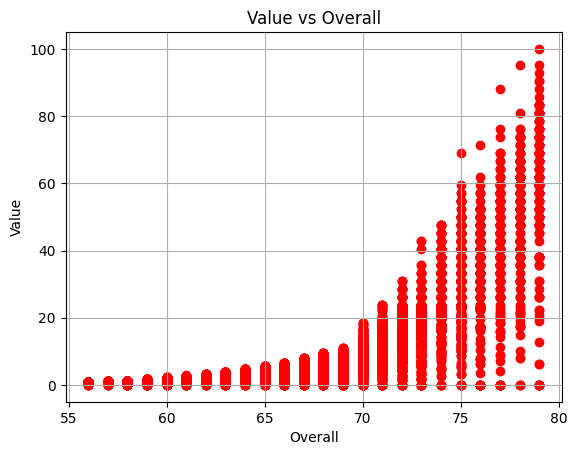

In [23]:
from numpy import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Cargar el dataset
df = pd.read_csv("code/dataset/FIFA21.csv")

relevant_feature = "overall"
# Seleccionar las columnas de interés
df = df[["long_name", "value_eur", relevant_feature]].dropna()

# Eliminar todos los valores cuyo overall sea menor a 60 o mayor a 80 ya que pueden ser outliers(valores atipicos)
df = df[df[relevant_feature] > 55]
df = df[df[relevant_feature] < 80]

# Normalizar la columna 'value_eur' a un rango de 0 a 100
df['value_eur_normalized'] = 100 * (df['value_eur'] - df['value_eur'].min()) / (df['value_eur'].max() - df['value_eur'].min())

# Definir las variables
x = df[relevant_feature]
y = df['value_eur_normalized']

# Grafico con los datos obtenidos
plt.scatter(x, y, color='red')
plt.title('Value vs Overall')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.grid()
plt.show()

De esta forma ya podemos ver que tiene cierta relacion entre el overall y el valor de mercado ya que al aumentar uno se puede ver el aumento del otro, asi que podemos avanzar con la recta estimativa de valores.

Para esto sacamos todos los valores necesarios para obtener una ecuacion de la recta tal que 
### Y = β1X + β0 + ε

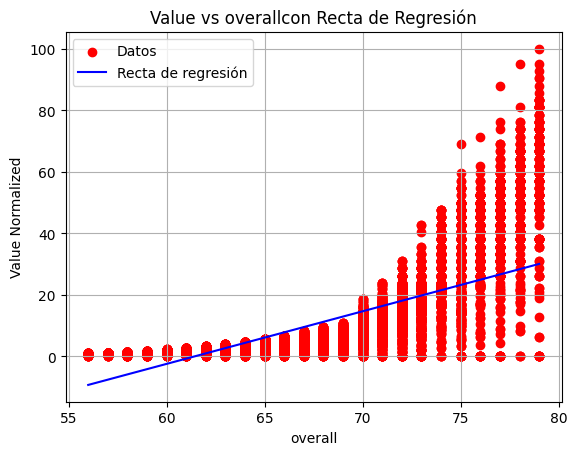

In [24]:
# Recta de regresión para predecir el valor de mercado
# de un jugador a partir de la característica más relevante

# Calcular la sumatoria de las variables x e y
x_sum = x.sum()
y_sum = y.sum()

# Calcular la media de las columnas 2 y 3
x_avg = x.mean()
y_avg = y.mean()

# Calcular la sumatoria de los cuadrados de las variables x e y
x_sq_sum = (x ** 2).sum()
y_sq_sum = (y ** 2).sum()

# Sigma al cuadrado de x e y (varianza corregida)
x_var = x_sq_sum / len(x) - (x_sum ** 2) / len(x)**2
y_var = y_sq_sum / len(y) - (y_sum ** 2) / len(y)**2

# Sigma de xy
xy_dev = ((x * y).sum() / len(x)) - (x_avg * y_avg)

# Coeficientes de la recta de regresión Pendiente y Ordenada
b1 = xy_dev / x_var
b0 = y_avg - b1 * x_avg

# Estimación de mínimos cuadrados
Sxy = (x * y).sum() - ((x.sum() * y.sum()) / len(x))
Sxx = x_sq_sum - ((x.sum() ** 2) / len(x))
Syy = y_sq_sum - ((y.sum() ** 2) / len(y))

# Coeficientes de la recta de regresión Pendiente y Ordenada
b1_hat = Sxy / Sxx
b0_hat = y_avg - b1_hat * x_avg

y_hat = b0_hat + b1_hat * x

# Dibujar recta a partir de y_hat
plt.scatter(x, y, color='red', label='Datos')
plt.plot(x, y_hat, color='blue', label='Recta de regresión')
plt.title('Value vs ' + relevant_feature + 'con Recta de Regresión')
plt.xlabel(relevant_feature)
plt.ylabel('Value Normalized')
plt.legend()
plt.grid()
plt.show()

*i) Prueba de significancia de regresión, coeficiente de determinación (R²) y correlación lineal
(r)*

In [25]:
SSr = Syy - (b1_hat * Sxy)

# Calculo de la varianza
sigma_hat_sqrd = SSr / (len(x) - 2)

# Calculo del coeficiente de determinación
R2 = 1 - SSr/Syy

# Coeficiente de Correlación Lineal
r = Sxy / sqrt(Sxx * Syy)

# Imprimir los resultados
print("SSr: " + str(SSr))
print("Varianza: " + str(sigma_hat_sqrd))
print("Coeficiente de determinacion: " + str(R2 * 100) + "%")
print("Coeficiente de correlación: " + str(r) + "\n")

# Prueba de significancia
# Se calcula el error estandar de la pendiente
dflen = len(x) - 2

sse = ((y - y_hat) ** 2).sum()
error_estandar_pendiente = sqrt(sse / (dflen * Sxx))

# Test de Hipótesis
t = b1_hat / error_estandar_pendiente

print("Error estandar de la pendiente: " + str(error_estandar_pendiente))
print("Test de Hipótesis: " + str(t))

SSr: 1150032.4691282844
Varianza: 67.77255401781392
Coeficiente de determinacion: 56.869199037800186%
Coeficiente de correlación: 0.754116695464304

Error estandar de la pendiente: 0.011440605711295652
Test de Hipótesis: 149.57978993033822


Sobre el coeficiente de determinacion este valor indica que el modelo explica el 56.86% de la variabilidad total en los datos. Si bien no es perfecto (100%), sigue siendo un buen indicador de que el modelo tiene una capacidad razonable para predecir el comportamiento de los datos.

Por otra parte el coeficiente de correlacion refleja la fuerza y la dirección de la relación entre las variables independientes y dependientes. Un valor de 0.7541 indica una fuerte correlación positiva, lo que significa que a medida que una variable aumenta, la otra también tiende a aumentar.

Error estandar de la pendiente: 0.01144 , este valor indica la precisión de la pendiente estimada. Un error estándar bajo sugiere que la pendiente está bien estimada y es confiable.

Test de hipotesis: 149.5797 Este valor es un estadístico t que evalúa si la pendiente es significativamente diferente de 0, lo que respalda la existencia de una relación entre las variables.

*ii) Inferencias sobre los parámetros de la recta, estimando las
fluctuaciones con una confianza del 95%.
Conclusión del test*


In [26]:

# Valor de P
p = 2 * (1 - stats.t.cdf(abs(t), dflen))

if p < 0.05:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

Se rechaza la hipótesis nula



Al rechazar la hipotesis nula se puede inferir que existe evidencia estadística para concluir que hay una relación significativa entre las variables *overall* y *value_eur*

*iii) La proporción de veces que el valor de mercado supera la incertidumbre de predicción
comparada con la respuesta media del valor de mercado para una característica fija, ambas
con la misma confianza y ancho mínimo.*

In [27]:
alpha = 0.05
t_alpha_half = stats.t.ppf(1 - alpha / 2, dflen)  # Valor crítico de t
x0 = x.mean()  # Característica fija, puedes cambiar a otro valor específico

# Predicción para x0
y0_hat = b0_hat + b1_hat * x0

# Incertidumbre de predicción
pred_interval = t_alpha_half * \
    sqrt(sigma_hat_sqrd * (1 + 1 / len(x) + (x0 - x_avg)**2 / Sxx))

# Intervalo de confianza para la media
conf_interval = t_alpha_half * \
    sqrt(sigma_hat_sqrd / len(x) + (x0 - x_avg)**2 / Sxx)

# Calcular la proporción de veces que el valor de mercado supera la
# incertidumbre de predicción
exceeds_prediction_interval = np.sum(
    (y > (y0_hat + pred_interval)) | (y < (y0_hat - pred_interval)))
proportion_exceeds = exceeds_prediction_interval / len(y)

# Imprimir resultados
print(f"Intervalo de Predicción: ±{pred_interval:.2f}")
print(f"Intervalo de Confianza para la Media: ±{conf_interval:2f}")
print(
    f"Proporción de veces que el valor de mercado supera la incertidumbre de predicción: {proportion_exceeds:.2f}")

Intervalo de Predicción: ±16.14
Intervalo de Confianza para la Media: ±0.123866
Proporción de veces que el valor de mercado supera la incertidumbre de predicción: 0.10


La incertidumbre de predicción (±16.14) es considerablemente mayor que la incertidumbre en la media (±0.1238), lo que es de esperarse, ya que predecir un nuevo valor individual es más incierto que estimar la media de muchos valores. La baja proporción (0.10) indica que en la mayoría de los casos, el valor de mercado real está dentro del rango de predicción, lo que sugiere que el modelo tiene un buen desempeño al predecir el mercado, aunque puede haber algunas fluctuaciones.

## Parte 2: Ecuación de predicción del valor de mercado

*b) Ecuación para predecir el valor de mercado del jugador a partir de varias
características*

Para esto decidimos tomar 2 valores que sabemos que tienen una relevancia considerable sobre el valor de mercado, en este caso el overall(x0), que sabemos que es la mas importante, y luego el potential(x1).



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("code/dataset/FIFA21.csv")

# Seleccionar las columnas de interés
y_key = 'value_eur'
x1_key = 'overall'
x2_key = 'potential'
x3_key = 'international_reputation'  # Tercera variable
df = df[[y_key, x1_key, x2_key, x3_key]].dropna()

# Eliminar todos los valores cuyo overall sea menor a 60 o mayor a 80
df = df[df[x1_key] > 55]
df = df[df[x1_key] < 80]

# Definir las variables
x1 = df[x1_key].values
x2 = df[x2_key].values
x3 = df[x3_key].values
y = df[y_key].values

# Normalizar y a valores entre 0 y 100
y_min = y.min()
y_max = y.max()

y_normalized = 100 * (y - y_min) / (y_max - y_min)

# Calcular la suma de los cuadrados de x1, x2 y x3
x1_sum = x1.sum()
x2_sum = x2.sum()
x3_sum = x3.sum()
y_sum = y_normalized.sum()

x1_square = (x1 ** 2).sum()
x2_square = (x2 ** 2).sum()
x3_square = (x3 ** 2).sum()

x1_x2 = (x1 * x2).sum()
x1_x3 = (x1 * x3).sum()
x2_x3 = (x2 * x3).sum()

x1_y = (x1 * y_normalized).sum()
x2_y = (x2 * y_normalized).sum()
x3_y = (x3 * y_normalized).sum()

# Resolver el sistema de ecuaciones
A = np.array([
    [len(y), x1_sum, x2_sum, x3_sum],
    [x1_sum, x1_square, x1_x2, x1_x3],
    [x2_sum, x1_x2, x2_square, x2_x3],
    [x3_sum, x1_x3, x2_x3, x3_square]
])

B = np.array([y_sum, x1_y, x2_y, x3_y])

beta = np.linalg.solve(A, B)

# Extraer los coeficientes de regresión
b0 = beta[0]  # Intersección
b1 = beta[1]  # Coeficiente de x1
b2 = beta[2]  # Coeficiente de x2
b3 = beta[3]  # Coeficiente de x3

# Mostrar los coeficientes de la regresión
print(f"Coeficiente b0 (intersección): {b0}")
print(f"Coeficiente b1 (Overall): {b1}")
print(f"Coeficiente b2 (Potential): {b2}")
print(f"Coeficiente b3 (International Reputation): {b3}")

# Predicción usando la ecuación de regresión múltiple
y_hat_normalized = b0 + b1 * x1 + b2 * x2 + b3 * x3

# Desnormalizar las predicciones para compararlas con el rango original
y_hat = y_min + (y_hat_normalized / 100) * (y_max - y_min)

# Imprimir la ecuación de regresión múltiple
print(f"Ecuación de regresión múltiple: y_hat = {b0} + {b1}*x1 + {b2}*x2 + {b3}*x3")

Coeficiente b0 (intersección): -126.90996355252237
Coeficiente b1 (Overall): 1.3006473069350535
Coeficiente b2 (Potential): 0.6559092774413233
Coeficiente b3 (International Reputation): 2.18837352156551
Ecuación de regresión múltiple: y_hat = -126.90996355252237 + 1.3006473069350535*x1 + 0.6559092774413233*x2 + 2.18837352156551*x3


Resumen de lo ejecutado:
* Carga el dataset y filtra overall >55 y <80 al igual que hicimos en la parte 1
* Normalización de la variable *value_eur* ya que posee valores muy grandes 
* Calcula varias sumas y productos necesarios para resolver el sistema de ecuaciones de la regresión: sumas de x1, x2 (overall, potential), sumas de cuadrados de estas variables, y productos cruzados de x1, x2 con la variable objetivo normalizada (y).
* Resolver el sistema de ecuaciones: Usa un sistema de ecuaciones lineales para obtener los coeficientes de regresión (b0, b1, b2) mediante la función np.linalg.solve.
* Imprime los coeficientes obtenidos:
  * b0: Intersección (constante).
  * b1: Coeficiente de overall.
  * b2: Coeficiente de potential.
  

Esto nos da la Ecuación de regresión múltiple
### *-126.8769 + 1.3412*x1 + 0.6502*x2*


### Gráfico de la ecuación


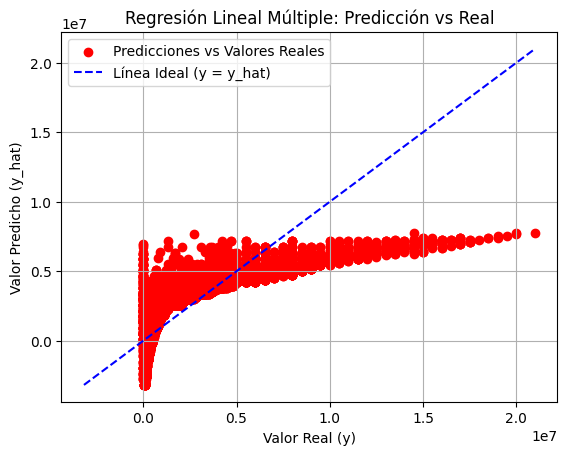

In [29]:
# Crear el gráfico de dispersión
plt.scatter(y, y_hat, color='red', label='Predicciones vs Valores Reales')

# Añadir la línea de referencia de "predicción perfecta"
min_val = min(y.min(), y_hat.min())
max_val = max(y.max(), y_hat.max())
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Línea Ideal (y = y_hat)')

# Etiquetas del gráfico
plt.xlabel('Valor Real (y)')
plt.ylabel('Valor Predicho (y_hat)')
plt.title('Regresión Lineal Múltiple: Predicción vs Real')

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.grid()
plt.show()

*i) Usando el método de mínimos cuadrados. Explica los indicadores obtenidos (como el
coeficiente de determinación y la correlación) y proporciona una breve interpretación de los
resultados*

In [30]:
# Calcular R²
ss_res = np.sum((y - y_hat) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"Coeficiente de determinación (R²): {r2}")

# Calcular los coeficientes de correlación
corr_overall = np.corrcoef(x1, y)[0, 1]
corr_potential = np.corrcoef(x2, y)[0, 1]
corr_international_reputation = np.corrcoef(x3, y)[0, 1]
corr_real_pred = np.corrcoef(y, y_hat)[0, 1]

# Imprimir los coeficientes de correlación
print(f"Correlación entre y (valor real) y y_hat (valor predicho): {corr_real_pred}")
print(f"Correlación entre overall y value_eur: {corr_overall}")
print(f"Correlación entre potential y value_eur: {corr_potential}")
print(f"Correlación entre international_reputation y value_eur: {corr_international_reputation}")


Coeficiente de determinación (R²): 0.6284872799796285
Correlación entre y (valor real) y y_hat (valor predicho): 0.7927718965627045
Correlación entre overall y value_eur: 0.7541166954642996
Correlación entre potential y value_eur: 0.6222427759403106
Correlación entre international_reputation y value_eur: 0.29279610466355255


Este análisis incluye el cálculo del coeficiente de determinación (R²) y las correlaciones entre las variables independientes (overall y potential) y la variable dependiente (value_eur).

El R² mide qué tan bien el modelo de regresión explica la variabilidad de la variable dependiente (value_eur). En este caso, un valor de 0.626 indica que aproximadamente el 62.6% de la variabilidad en el valor del jugador se explica por los atributos overall y potential. Esto sugiere que el modelo tiene una buena capacidad predictiva, aunque aún hay un 38.4% de la variabilidad que no es explicada por estos factores. Este porcentaje aumentó respecto a la regresion lineal simple realizada en la parte el cual era de 56.86%

En la correlacion se presenta que estos 2 valores(overall y potential) al aumentar tienden a aumentar el valor de mercado y mejora la correlacion respecto al modelo de regresion lineal simple.


*ii) Usando el método de descenso por gradiente. ¿Son los valores obtenidos iguales a los
conseguidos mediante la resolución del sistema de ecuaciones normales? Muestra los
resultados obtenidos junto con las últimas iteraciones del algoritmo. Indica los valores de los
parámetros utilizados (como tasa de aprendizaje y número de iteraciones).*

In [31]:
# Cargar el dataset
df = pd.read_csv("code/dataset/FIFA21.csv")

# Seleccionar las columnas de interés
y_key = 'value_eur'
x1_key = 'overall'
x2_key = 'potential'
x3_key = 'international_reputation'
df = df[[y_key, x1_key, x2_key, x3_key]].dropna()

# Filtrar datos con overall mayor a 55 y menor a 80
df = df[df["overall"] > 55]
df = df[df["overall"] < 80]

# Verificar y limpiar datos
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Definir las variables
x1 = df[x1_key].values
x2 = df[x2_key].values
x3 = df[x3_key].values
y = df[y_key].values

# Normalizar los datos manualmente


def normalize(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    normalized_X = (X - means) / stds
    return normalized_X, means, stds


# Agregar una columna de 1s para el término de intersección
X = np.vstack([x1, x2, x3]).T
X, means, stds = normalize(X)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Añadir la columna de 1s

# Inicializar parámetros
theta = np.zeros(X.shape[1])
alpha = 0.01  # Tasa de aprendizaje
max_iterations = 1000
tolerance = 1e-6

# Función de costo


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost


# Descenso por gradiente con criterio de convergencia
cost_history = []
for i in range(max_iterations):
    predictions = X.dot(theta)
    errors = predictions - y
    gradient = (1 / len(y)) * X.T.dot(errors)

    theta -= alpha * gradient
    cost = compute_cost(X, y, theta)

    cost_history.append(cost)

    if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
        print(f"Convergencia alcanzada después de {i+1} iteraciones")
        break

# Mostrar los resultados finales
print(f"Coeficiente b0 (intersección): {theta[0]}")
print(f"Coeficiente b1 (Overall): {theta[1]}")
print(f"Coeficiente b2 (Potential): {theta[2]}")
print(f"Coeficiente b3 (International Reputation): {theta[3]}")

# Predicción usando la ecuación de regresión múltiple
y_hat = X.dot(theta)

# Imprimir predicciones
print(f"Predicciones: {y_hat[:5]}")  # Mostrar solo las primeras 5 predicciones
print(f"Ecuación de regresión múltiple: y_hat = {theta[0]} + {theta[1]}*x1 + {theta[2]}*x2 + {theta[3]}*x3")

# Calcular la Suma de los Cuadrados de los Residuos (SSR)
SSR = np.sum((y - y_hat) ** 2)

# Número total de observaciones
n = len(y)

# Número de variables independientes
k = 3

# Calcular la varianza residual (σ²)
sigma_squared = SSR / (n - k - 1)

# Imprimir los resultados
print(f"SSR: {SSR}")
print(f"Varianza Residual (σ²): {sigma_squared}")

# Calcular la Suma Total de los Cuadrados (SST)
y_avg = y.mean()
SST = np.sum((y - y_avg) ** 2)

# Calcular el coeficiente de determinación (R²)
R_squared = 1 - (SSR / SST)

# Calcular el coeficiente de correlación entre las predicciones y los valores reales
correlation = np.corrcoef(y_hat, y)[0, 1]

# Imprimir los resultados
print(f"Coeficiente de Determinación (R²): {R_squared}")
print(f"Coeficiente de correlación: {correlation}")


Coeficiente b0 (intersección): 1752108.9650436833
Coeficiente b1 (Overall): 1500859.300919861
Coeficiente b2 (Potential): 777846.6076714648
Coeficiente b3 (International Reputation): 128134.18655657682
Predicciones: [7786251.93926178 7786251.93926178 7508421.6485788  7508421.6485788
 7369506.5032373 ]
Ecuación de regresión múltiple: y_hat = 1752108.9650436833 + 1500859.300919861*x1 + 777846.6076714648*x2 + 128134.18655657682*x3
SSR: 4.36860241474542e+16
Varianza Residual (σ²): 2574764197999.3047
Coeficiente de Determinación (R²): 0.6284807226829341
Coeficiente de correlación: 0.7927678971827152


Podemos apreciar que el coeficiente de determinacion y correlacion nos da practicamente igual que con el metodo de minimos cuadrados asi que por mas que la ecuacion sea distinta posee una precision similar que el metodo de minimos cuadrados.

### Graficos obtenidos de la ecuacion de la recta con descenso de gradiente.



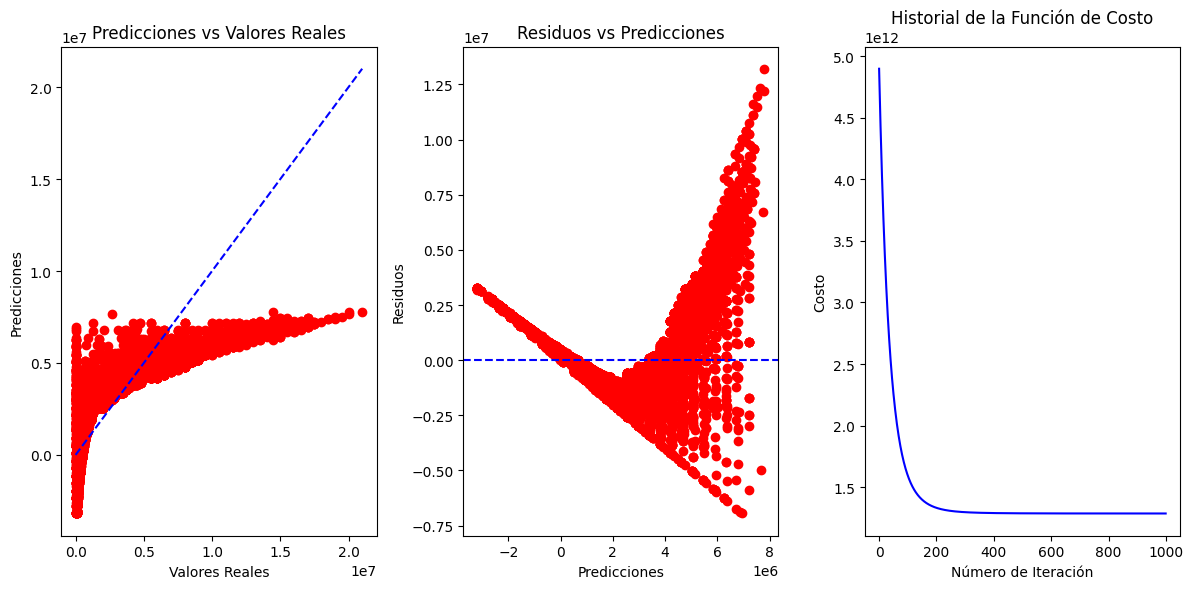

In [32]:
# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y, y_hat, color='red')
plt.plot([min(y), max(y)], [min(y), max(y)], color='blue', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Gráfico de Residuos
residuos = y - y_hat
plt.subplot(1, 3, 2)
plt.scatter(y_hat, residuos, color='red')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.tight_layout()

# Gráfico de la función de costo durante las iteraciones
plt.subplot(1, 3, 3)
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title('Historial de la Función de Costo')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.show()



Los graficos obtenidos corroboran lo mucho que se parece al metodo de minimos cuadrados, la forma de la grafica es practicamente igual. 

*iii) Da una interpretación del criterio de corte utilizado en el algoritmo del gradiente. Explica
si presenta alguna falla. Si no es una buena condición de corte, ¿puedes sugerir un criterio
alternativo más eficaz?*

El criterio utilizado para detener el algoritmo del descenso por gradiente es la diferencia entre los costos de iteraciones consecutivas, que debe ser menor a una tolerancia. Este criterio es común, pero tiene algunas desventajas:

**Problema**: Si la tasa de aprendizaje es muy pequeña, el gradiente puede avanzar lentamente, haciendo que el algoritmo tarde en converger. Si la tasa es muy grande, el algoritmo podría no converger.

**Alternativa**: Usar un criterio de corte basado en el valor del gradiente (cuando sea cercano a cero) podría ser más efectivo, ya que indica que estamos cerca de un punto mínimo del costo. 

## Parte 3: Comportamiento del método de descenso por gradiente

*c) Convergencia del método de descenso por gradiente. Explicar si el método siempre
converge al mínimo de la función. En caso contrario, proporciona un contraejemplo para
ilustrar este comportamiento.*

El algoritmo de descenso por gradiente tiene como objetivo minimizar una función de costo ajustando los parámetros en cada iteración.
La convergencia depende de la tasa de aprendizaje (alpha) y la forma de la función objetivo. Si la tasa de aprendizaje es demasiado alta, el algoritmo puede no converger al mínimo o saltarse el óptimo; si es demasiado baja, el algoritmo convergerá muy lentamente.
El costo debería disminuir de manera progresiva en cada iteración hasta alcanzar un valor estable (criterio de corte basado en el cambio en el costo, o en el número máximo de iteraciones).

Contraejemplos de no convergencia:

Se puede mostrar cómo, con una tasa de aprendizaje demasiado alta, el método no converge o presenta oscilaciones.
Además, un caso con una tasa de aprendizaje demasiado baja resultará en una convergencia extremadamente lenta.
Modificaremos el código para que simule esos dos escenarios:

Con una tasa de aprendizaje muy alta, el algoritmo oscilará.

Con una tasa de aprendizaje muy baja, la convergencia será extremadamente lenta.

Convergencia alcanzada para alpha=0.1 después de 379 iteraciones


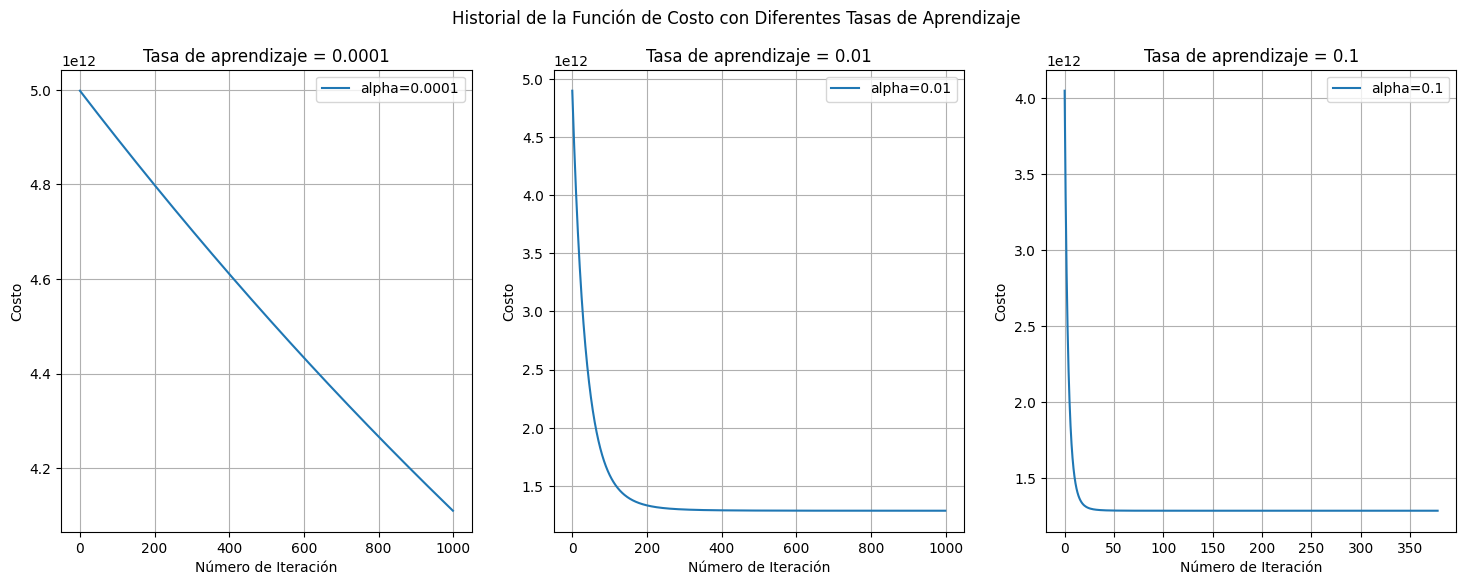

In [33]:
# Modificación para ilustrar la convergencia y no convergencia
alphas = [0.0001, 0.01, 0.1]  # Tres tasas de aprendizaje diferentes

plt.figure(figsize=(18, 6))
for idx, alpha in enumerate(alphas):
    theta = np.zeros(X.shape[1])  # Reinicializar los parámetros
    cost_history = []

    for i in range(max_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / len(y)) * X.T.dot(errors)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            print(f"Convergencia alcanzada para alpha={alpha} después de {i+1} iteraciones")
            break
    
    # Graficar el historial de la función de costo
    plt.subplot(1, len(alphas), idx + 1)
    plt.plot(range(len(cost_history)), cost_history, label=f"alpha={alpha}")
    plt.title(f"Tasa de aprendizaje = {alpha}")
    plt.xlabel('Número de Iteración')
    plt.ylabel('Costo')
    plt.grid(True)
    plt.legend()

plt.suptitle('Historial de la Función de Costo con Diferentes Tasas de Aprendizaje')
plt.show()

Explicación del Código y Resultados
Convergencia lenta (alpha=0.0001):

Con una tasa de aprendizaje muy baja, el algoritmo avanza lentamente y toma muchas iteraciones para alcanzar la convergencia. El costo disminuye poco a poco, pero el proceso puede ser ineficiente.
Convergencia adecuada (alpha=0.01):

Esta es una tasa de aprendizaje razonable. El costo disminuye de manera estable y converge después de un número razonable de iteraciones, lo que demuestra un comportamiento de convergencia adecuado.
No convergencia u oscilación (alpha=0.1):

Con una tasa de aprendizaje alta, el algoritmo tiende a saltarse el mínimo y oscilar en lugar de converger, lo que resulta en una gráfica de costo que no baja de manera estable.

Conclusión:
El algoritmo puede converger si el cambio en el costo entre iteraciones es menor que un umbral(tolerancia), pero si la tasa de aprendizaje es demasiado alta, puede no converger. Para evitar estos problemas, es crucial seleccionar un valor de alpha que no sea ni demasiado bajo ni demasiado alto.
Se puede hacer un criterio alternativo basado en la estabilidad del gradiente o en el comportamiento del costo para mejorar la eficiencia del algoritmo.